In [1]:
# %matplotlib Qt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from modules import LLS_3D

In [3]:
data = pd.read_csv('data/BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = data[['rm', 'age']].values
y = data['medv'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LLS_3D()
model.fit(X_train, y_train)

In [7]:
y_pred = model.predict(X_test)

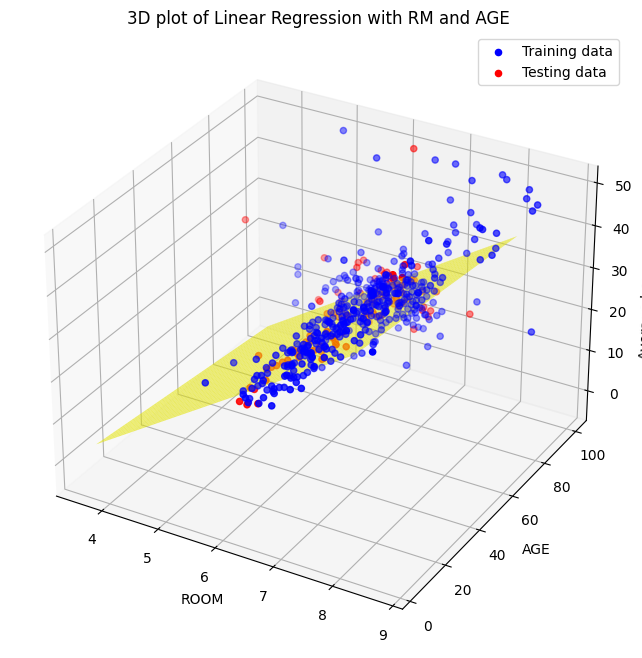

In [8]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# train data 
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='Training data')
# test data
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='red', label='Testing data')
# predicted surface 
x_surf, y_surf = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100),
                             np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100))
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()])
z_surf = z_surf.reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, color='yellow', alpha=0.6)

ax.set_xlabel('ROOM')
ax.set_ylabel('AGE')
ax.set_zlabel('Average house price')
ax.set_title('3D plot of Linear Regression with RM and AGE')
ax.legend()

plt.show()
